# Goal

To understand xarray and when it's a suitable data model. We will also have a look at the MSv4 structure and perform some basic operations on the data

The measurement set used here can be downloaded from https://support.astron.nl/software/ci_data/IDG/MWA-1052736496-averaged.ms.tgz

Note:
1. Model column is currently not supported in MSv4, use the fork https://github.com/Mark1626/xradio/tree/ms-conv-include-model
2. The IDG section might have some issues, as the subgrid plan is not correct

In [1]:
import numpy as np
import seaborn as sns
# import pandas as pd
from einops import rearrange

import dask.array as da
import matplotlib.pyplot as plt

In [2]:
msname = "MWA-1052736496-averaged.ms"
psname = "MWA.ps"

In [3]:
from xradio.vis import convert_msv2_to_processing_set
import os

os.system(f"rm -rf {psname}")

# convert_msv2_to_processing_set(in_file=msname, out_file=psname, partition_scheme='ddi_state_field')
convert_msv2_to_processing_set(in_file=msname, out_file=psname, partition_scheme='ddi_intent_field')

In [4]:
from xradio.vis import load_processing_set

msv4file = psname
sel = 'MWA.ps_ddi_0_intent_None_field_id_0'

ps = load_processing_set(msv4file, sel_parms={
   sel  : {'frequency': slice(0, 384, None),'time':slice(0,100)}   
})[sel]

In [5]:
ps

<xarray.Dataset> Size: 2GB
Dimensions:                     (time: 28, baseline_id: 2628, frequency: 384,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int32 11kB 1 1 1 1 ... 126 126 127
    baseline_antenna2_id        (baseline_id) int32 11kB 1 2 3 4 ... 126 127 127
  * baseline_id                 (baseline_id) int64 21kB 0 1 2 ... 2626 2627
  * frequency                   (frequency) float64 3kB 1.338e+08 ... 1.644e+08
  * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * time                        (time) float64 224B 1.369e+09 ... 1.369e+09
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 589kB 4.0 ... 4.0
    FLAG                        (time, baseline_id, frequency, polarization) bool 113MB ...
    TIME_CENTROID               (time, baseline_id) float64 589kB 4.875e+09 ....
    UVW                         (time, baseline_id, uvw_label) float64 2MB 0....
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 904MB ...
    VIS_MODEL                   (time, baseline_id, frequency, polarization) complex64 904MB ...
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 452MB ...
Attributes:
    data_groups:   {'base': {'flag': 'FLAG', 'uvw': 'UVW', 'visibility': 'VIS...
    ddi:           0
    intent:        None
    antenna_xds:   <xarray.Dataset> Size: 23kB\nDimensions:        (antenna_i...
    pointing_xds:  <xarray.Dataset> Size: 0B\nDimensions:  ()\nData variables...

## Data Slicing

Select baseline 20, time slice (0, 10)

In [6]:
baseline_4 = ps.sel({"baseline_id": [4]}).isel(time=slice(10))
baseline_4

<xarray.Dataset> Size: 326kB
Dimensions:                     (time: 10, baseline_id: 1, frequency: 384,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_id        (baseline_id) int32 4B 1
    baseline_antenna2_id        (baseline_id) int32 4B 5
  * baseline_id                 (baseline_id) int64 8B 4
  * frequency                   (frequency) float64 3kB 1.338e+08 ... 1.644e+08
  * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * time                        (time) float64 80B 1.369e+09 ... 1.369e+09
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 80B 4.0 4.0 ... 4.0
    FLAG                        (time, baseline_id, frequency, polarization) bool 15kB ...
    TIME_CENTROID               (time, baseline_id) float64 80B 4.875e+09 ......
    UVW                         (time, baseline_id, uvw_label) float64 240B 1...
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 123kB ...
    VIS_MODEL                   (time, baseline_id, frequency, polarization) complex64 123kB ...
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 61kB ...
Attributes:
    data_groups:   {'base': {'flag': 'FLAG', 'uvw': 'UVW', 'visibility': 'VIS...
    ddi:           0
    intent:        None
    antenna_xds:   <xarray.Dataset> Size: 23kB\nDimensions:        (antenna_i...
    pointing_xds:  <xarray.Dataset> Size: 0B\nDimensions:  ()\nData variables...

In [7]:
selection = ps.sel({"uvw_label": ["u", "v"]})
selection.UVW

<xarray.DataArray 'UVW' (time: 28, baseline_id: 2628, uvw_label: 2)> Size: 1MB
array([[[  0.        ,   0.        ],
        [ -5.20127838,   6.02036654],
        [-12.28933492,  16.15480026],
        ...,
        [  0.        ,   0.        ],
        [-38.63473068, 102.280219  ],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [ -5.19986831,   6.02139716],
        [-12.28570545,  16.1572352 ],
        ...,
        [  0.        ,   0.        ],
        [-38.61560794, 102.28786951],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [ -5.19845665,   6.02242834],
        [-12.28207197,  16.15967141],
        ...,
...
        ...,
        [  0.        ,   0.        ],
        [-38.15552608, 102.47040604],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [ -5.16446066,   6.04708087],
        [-12.19459756,  16.21789648],
        ...,
        [  0.        ,   0.        ],
        [-38.1363062 , 102.47796783],
        [  0.        ,   0.        ]],

       [[  0.        ,   0.        ],
        [ -5.16303915,   6.0481042 ],
        [-12.19094105,  16.22031267],
        ...,
        [  0.        ,   0.        ],
        [-38.11709878, 102.48551965],
        [  0.        ,   0.        ]]])
Coordinates:
    baseline_antenna1_id  (baseline_id) int32 11kB 1 1 1 1 1 ... 125 126 126 127
    baseline_antenna2_id  (baseline_id) int32 11kB 1 2 3 4 5 ... 127 126 127 127
  * baseline_id           (baseline_id) int64 21kB 0 1 2 3 ... 2625 2626 2627
  * time                  (time) float64 224B 1.369e+09 1.369e+09 ... 1.369e+09
  * uvw_label             (uvw_label) <U1 8B 'u' 'v'
Attributes:
    frame:    FK5
    type:     uvw
    units:    ['m', 'm', 'm']

Select `XX` from the visibilities

In [8]:
baseline_4_pol_XX = baseline_4.VISIBILITY.sel(polarization=["XX", "YY"])
baseline_4_pol_XX

<xarray.DataArray 'VISIBILITY' (time: 10, baseline_id: 1, frequency: 384,
                                polarization: 2)> Size: 61kB
array([[[[  0.        +0.j     ,   0.        +0.j     ],
         [  0.        +0.j     ,   0.        +0.j     ],
         [  0.        +0.j     ,   0.        +0.j     ],
         ...,
         [  0.        +0.j     ,   0.        +0.j     ],
         [  0.        +0.j     ,   0.        +0.j     ],
         [  0.        +0.j     ,   0.        +0.j     ]]],


       [[[  0.        +0.j     ,   0.        +0.j     ],
         [418.6579  -247.30876j, 242.48203 -297.66058j],
         [348.4294  -253.71172j, 315.45523 -309.644j  ],
         ...,
         [112.47847 -352.26816j, 134.91318 -391.2486j ],
         [ 56.437916-338.83868j, 226.95361 -203.27158j],
         [  0.        +0.j     ,   0.        +0.j     ]]],


       [[[  0.        +0.j     ,   0.        +0.j     ],
         [323.90942 -225.72873j, 341.25464  -85.41229j],
...
         [  0.        +0.j     ,   0.        +0.j     ]]],


       [[[  0.        +0.j     ,   0.        +0.j     ],
         [391.25284 -343.3944j , 492.44186 -237.37466j],
         [343.17786 -240.86328j, 354.44376 -306.8066j ],
         ...,
         [120.7699  -397.9222j , 160.25273 -298.3488j ],
         [138.43892 -397.80356j, 270.0182  -410.4412j ],
         [  0.        +0.j     ,   0.        +0.j     ]]],


       [[[  0.        +0.j     ,   0.        +0.j     ],
         [280.75867 -325.08795j, 395.09848 -201.47023j],
         [386.33856 -240.43341j, 457.3215  -272.21265j],
         ...,
         [129.18968 -277.42453j, 201.98885 -347.25244j],
         [ 44.084965-296.81744j, 222.38536 -330.04465j],
         [  0.        +0.j     ,   0.        +0.j     ]]]],
      dtype=complex64)
Coordinates:
    baseline_antenna1_id  (baseline_id) int32 4B 1
    baseline_antenna2_id  (baseline_id) int32 4B 5
  * baseline_id           (baseline_id) int64 8B 4
  * frequency             (frequency) float64 3kB 1.338e+08 ... 1.644e+08
  * polarization          (polarization) <U2 16B 'XX' 'YY'
  * time                  (time) float64 80B 1.369e+09 1.369e+09 ... 1.369e+09
Attributes:
    field_info:  {'code': '', 'delay_direction': {'attrs': {'frame': 'FK5', '...
    type:        quanta
    units:       ['unkown']

## Plotting the UV Track

**Note:** This should rather be done by using an unstack on uvw. This currently cannot be done as `uvw_label` is not a `MultiIndex`

https://docs.xarray.dev/en/stable/generated/xarray.DataArray.unstack.html#xarray.DataArray.unstack


In [9]:
def plot_uv_track(ps):
    (u, v, _) = rearrange(ps.UVW.values, "t b v -> v (t b)")

    plt.scatter(u, v)
    plt.scatter(-u, -v)
    plt.xlabel("U (m)")
    plt.ylabel("V (m)")

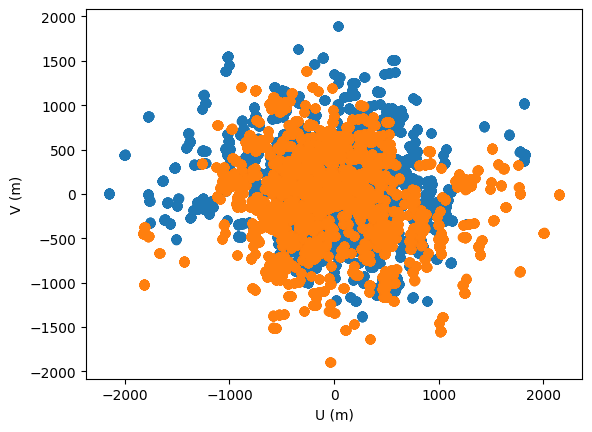

In [10]:
plot_uv_track(ps)

In [ ]:
# ps.UVW.sel({"baseline_antenna1_id": [1, 10, 30]})
# plot_uv_track(ps.sel({"baseline_antenna1_id": [1, 10, 30]}))

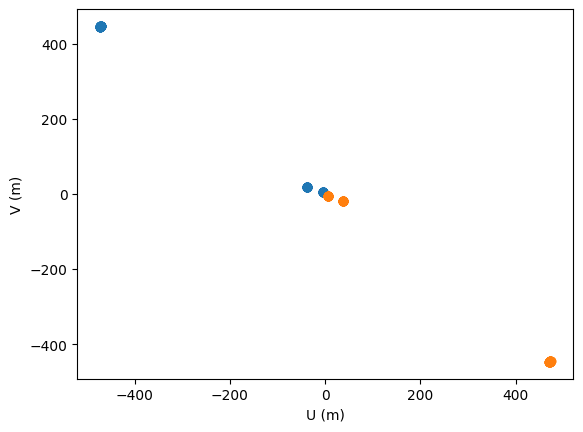

In [11]:
plot_uv_track(ps.sel({"baseline_id": [1, 20, 64]}))

In [12]:
def plot_uvw_track(ps):
    (u, v, w) = rearrange(ps.UVW.values, "t b v -> v (t b)")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(u, v, w, c='b', marker='o')

    ax.set_xlabel('U')
    ax.set_ylabel('V')
    ax.set_zlabel('W')

    ax.view_init(elev=20, azim=30)
    plt.show()

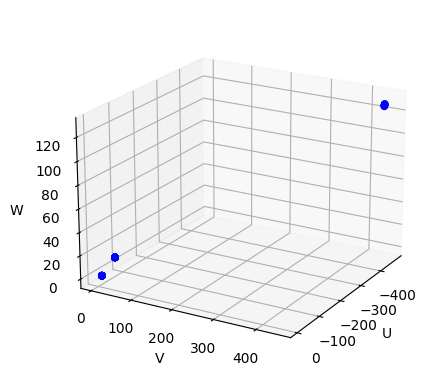

In [13]:
plot_uvw_track(ps.sel({"baseline_id": [1, 20, 64]}))

## Plotting Antenna Configuration

In [14]:
ps.antenna_xds

<xarray.Dataset> Size: 23kB
Dimensions:        (antenna_id: 128, xyz_label: 3)
Coordinates:
  * antenna_id     (antenna_id) int64 1kB 0 1 2 3 4 5 ... 123 124 125 126 127
    mount          (antenna_id) <U6 3kB 'ALT-AZ' 'ALT-AZ' ... 'ALT-AZ' 'ALT-AZ'
    name           (antenna_id) <U7 4kB 'Tile11' 'Tile12' ... 'Tile168'
    station        (antenna_id) <U3 2kB 'MWA' 'MWA' 'MWA' ... 'MWA' 'MWA' 'MWA'
    type           (antenna_id) <U12 6kB 'GROUND-BASED' ... 'GROUND-BASED'
  * xyz_label      (xyz_label) <U1 12B 'x' 'y' 'z'
Data variables:
    DISH_DIAMETER  (antenna_id) float64 1kB 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    FEED_OFFSET    (antenna_id, xyz_label) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    POSITION       (antenna_id, xyz_label) float64 3kB -2.56e+06 ... -2.849e+06

In [15]:
def plot_antenna_config(ps, antennas=None):
    pos = ps.antenna_xds.POSITION - ps.antenna_xds.POSITION.mean(dim="antenna_id")

    # Select only antenna's that are part of the main XDS
    if antennas is None:
        antennas = np.concatenate([
            ps.coords['baseline_antenna1_id'].values,
            ps.coords['baseline_antenna2_id'].values
        ]).tolist()

    pos = pos.sel(antenna_id=antennas)
    (x, y, _) = rearrange(pos.values, "a v -> v a")
    
    # TODO: Readd labelling antennas
#     def plotlabel(xvar, yvar, label):
#         ax.text(xvar+0.002, yvar+0.002, label)

    (xmin, ymin, _) = pos.min(dim="antenna_id").values * 1.1
    (xmax, ymax, _) = pos.max(dim="antenna_id").values * 1.1

    fig=plt.figure(figsize=(6,6))

    plt.scatter(x, y)
#     plt.xlim(xmin, xmax)
#     plt.ylim(ymin, ymax)
    plt.xlabel("E (m)")
    plt.ylabel("N (m)")
    plt.title("Antenna Positions")
    
#     plt.axes().set_aspect('equal')


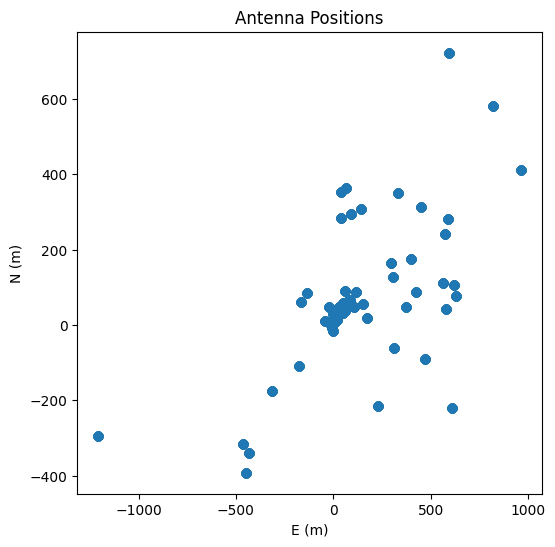

In [16]:
plot_antenna_config(ps)

Plotting just a couple of antennas

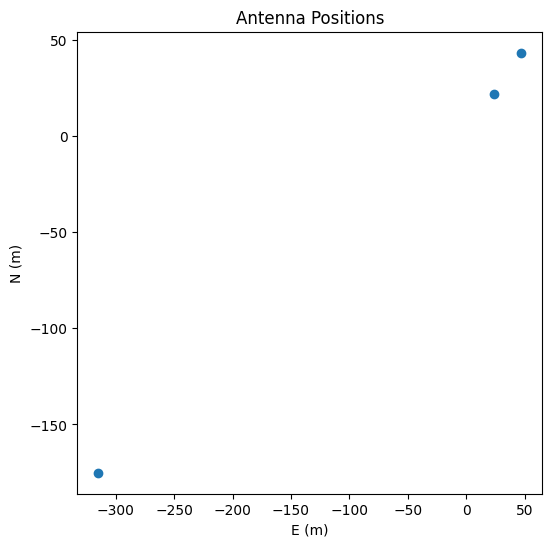

In [17]:
plot_antenna_config(ps, [1, 20, 64])

Plotting antenna's of a baseline

In [18]:
selected_baselines = ps.sel({"baseline_id": [4, 8]})

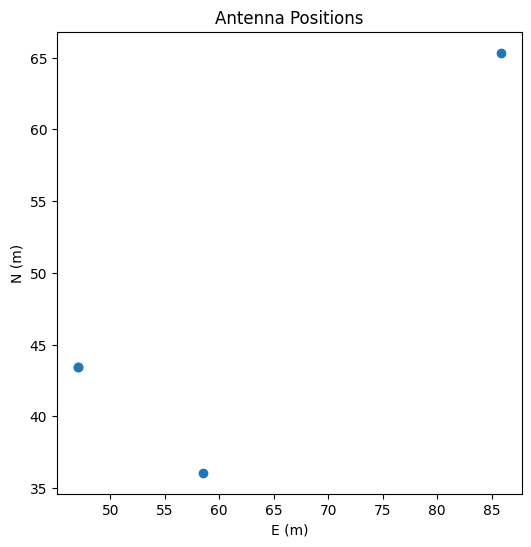

In [19]:
plot_antenna_config(selected_baselines)

## Analysing Visibility data

In [20]:
def get_figure_name(name):
    return "Figure %d: %s" % (len(plt.get_fignums()) + 1, name)

def plot_visibilities(visibilities, form='abs'):
    (XX, XY, YX, YY) = rearrange(visibilities, "t b c p -> p (t b c)")
    
    if form == 'angle':
        visXX = np.angle(XX)
        visXY = np.angle(XY)
        visYX = np.angle(YX)
        visYY = np.angle(YY)
        title = "Angle"
    elif form == 'real':
        visXX = np.real(XX)
        visXY = np.real(XY)
        visYX = np.real(YX)
        visYY = np.real(YY)
        title = "Real"
    elif form == 'imag':
        visXX = np.imag(XX)
        visXY = np.imag(XY)
        visYX = np.imag(YX)
        visYY = np.imag(YY)
        title = "Imag"
    else:
        visXX = np.abs(XX)
        visXY = np.abs(XY)
        visYX = np.abs(YX)
        visYY = np.abs(YY)
        title = "Abs"

    fig, axarr = plt.subplots(2, 2, num=get_figure_name("visibilities"))
    fig.suptitle(f"Visibilites {title}", fontsize=14)

    axarr[0, 0].plot(visXX)
    axarr[0, 1].plot(visXY)
    axarr[1, 0].plot(visYX)
    axarr[1, 1].plot(visYY)

    axarr[0, 0].set_title('XX')
    axarr[0, 0].set_xlabel('Vis')
    axarr[0, 0].set_ylabel(title)
    
    axarr[0, 1].set_title('XY')
    axarr[0, 1].set_xlabel('Vis')
    axarr[0, 1].set_ylabel(title)
    
    axarr[1, 0].set_title('YX')
    axarr[1, 0].set_xlabel('Vis')
    axarr[1, 0].set_ylabel(title)
    
    axarr[1, 1].set_title('YY')
    axarr[1, 1].set_xlabel('Vis')
    axarr[1, 1].set_ylabel(title)
    
    axarr[0, 0].tick_params(axis='both',
                          which='both',
                          bottom=False,
                          top=False,
                          labelbottom=False)

    axarr[0, 1].tick_params(axis='both',
                          which='both',
                          bottom=False,
                          top=False,
                          labelbottom=False)

    axarr[1, 0].tick_params(axis='both',
                          which='both',
                          bottom=False,
                          top=False,
                          labelbottom=False)

    axarr[1, 1].tick_params(axis='both',
                          which='both',
                          bottom=False,
                          top=False,
                          labelbottom=False)

    plt.tight_layout()


In [21]:
baseline_24 = ps.sel({"baseline_id": [24]}).isel(time=slice(8, 9))

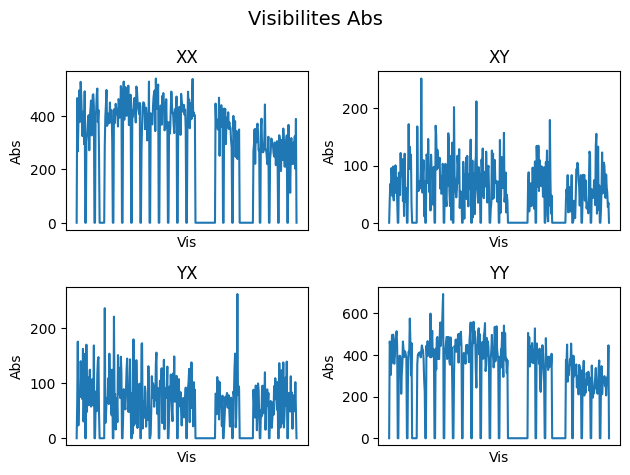

In [22]:
plot_visibilities(baseline_24.VISIBILITY.values)

## Gridding the visibility data

In [23]:
def compute_l(x, subgrid_size, image_size):
    return (x+0.5-(subgrid_size/2)) * image_size/subgrid_size

def compute_m(y, subgrid_size, image_size):
    return compute_l(y, subgrid_size, image_size)

def compute_n(l, m):
    """
    evaluate n = 1.0f - sqrt(1.0 - (l * l) - (m * m));
    accurately for small values of l and m
    """
    tmp = (l * l) + (m * m)
    return np.where(tmp > 1.0, 1.0, tmp / (1.0 + np.sqrt(1.0 - tmp)))

def compute_lmn(subgrid_size, image_size):
    x, y = np.meshgrid(np.arange(subgrid_size), np.arange(subgrid_size))
    x = x.reshape(subgrid_size * subgrid_size)
    y = y.reshape(subgrid_size * subgrid_size)
    l = compute_l(x, subgrid_size, image_size)
    m = compute_m(y, subgrid_size, image_size)
    n = compute_n(l, m)
    return rearrange(np.stack([l,m,n]), "x p -> p x")


In [24]:
nr_timesteps = 28
nr_channels = 384
image_size = 0.2
# Subgrid size 
subgrid_size = 32
grid_size = 512
nr_pixels = subgrid_size * subgrid_size

In [25]:
# Image Domain Gridder
def gridding(visibilities, lmn, uvw, uvw_off, wave_numbers, taper):
    phase_off = np.broadcast_to(np.einsum("px,x->p", lmn, uvw_off), (nr_timesteps, nr_channels, nr_pixels))
    phase_coefficient = np.einsum("px,tx,c->tcp", lmn, uvw, wave_numbers)
    phase = phase_off - phase_coefficient
    phasor = np.cos(phase) + 1j * np.sin(phase) # Calculate phasor
    pixels = np.einsum("tcz,tcp->zp",visibilities,phasor) # Grid with visibilty

#     aterm_corrected = aterm_gridding(pixels, aterm1, aterm2) # A-Term Correction

    subgrid = np.einsum("zp,p->zp", pixels, taper) # Apply tapering

    return subgrid

In [26]:
speed_of_light = 299792458.0

def compute_wavenumber(frequencies):
    return (frequencies * 2 * np.pi) / speed_of_light

In [27]:

def evaluate_spheroidal(nu):
    """Function to compute spheroidal
        Based on libreSpheroidal function in CASA
        https://github.com/radio-astro/casa/blob/4ebd5b1508a5d31b74e7b5f6b89313368d30b9ef/code/synthesis/TransformMachines/Utils.cc#L776"""
    P = np.array(
        [[8.203343e-2, -3.644705e-1, 6.278660e-1, -5.335581e-1, 2.312756e-1],
         [4.028559e-3, -3.697768e-2, 1.021332e-1, -1.201436e-1, 6.412774e-2]])
    Q = np.array([[1.0000000e0, 8.212018e-1, 2.078043e-1],
                     [1.0000000e0, 9.599102e-1, 2.918724e-1]])

    part = 0
    end = 0.0

    if (nu >= 0.0 and nu < 0.75):
        part = 0
        end = 0.75
    elif (nu >= 0.75 and nu <= 1.00):
        part = 1
        end = 1.00
    else:
        return 0.0

    nusq = nu * nu
    delnusq = nusq - end * end
    delnusqPow = delnusq
    top = P[part][0]
    for k in range(1, 5):
        top += P[part][k] * delnusqPow
        delnusqPow *= delnusq

    bot = Q[part][0]
    delnusqPow = delnusq
    for k in range(1, 3):
        bot += Q[part][k] * delnusqPow
        delnusqPow *= delnusq

    if bot == 0:
        result = 0
    else:
        result = (1.0 - nusq) * (top / bot)
    return result


def make_gaussian(size, fwhm=3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4 * np.log(2) * ((x - x0)**2 + (y - y0)**2) / fwhm**2)


def compute_taper_subgrid(subgrid_size, taper_type='spheroidal'):
    """
    Creates taper for grid
    taper_type = 'spheroidal'  | 'gaussian' | 'ones'
    """
    if taper_type == 'spheroidal':
        # Construct taper for subgrid
        # Spheroidal from Bas
        x = np.array(np.abs(
            np.linspace(-1, 1, num=subgrid_size, endpoint=False)),
                        dtype=np.float32)
        x = np.array([evaluate_spheroidal(e) for e in x], dtype=np.float32)
        taper = x[np.newaxis, :] * x[:, np.newaxis]
        return taper
    elif taper_type == "gaussian":
        return make_gaussian(subgrid_size, int(subgrid_size * 0.3))

    return np.ones((subgrid_size, subgrid_size), dtype = np.float32)

In [28]:
baseline_4 = ps.sel({"baseline_id": [36]})

lmn = compute_lmn(subgrid_size, image_size)
uvw = baseline_4.UVW.squeeze().values
vis = baseline_4.VISIBILITY.squeeze().values
frequencies = baseline_4.frequency.values
wavenumbers = compute_wavenumber(frequencies)
taper = compute_taper_subgrid(subgrid_size, taper_type='ones').reshape(subgrid_size * subgrid_size)

In [29]:
w_step = 0.0
# TODO: This has to be replaced by a proper plan
baseline_coordinates = [0, 0, 0]

x_coordinate = baseline_coordinates[0]
y_coordinate = baseline_coordinates[1]
w_offset_in_lamba = w_step * (baseline_coordinates[2] + 0.5)

u_offset = (x_coordinate + subgrid_size/2 - grid_size/2) * (2 * np.pi / image_size)
v_offset = (y_coordinate + subgrid_size/2 - grid_size/2) * (2 * np.pi / image_size)
w_offset = 2*np.pi * w_offset_in_lamba

In [30]:
uvw_off = np.array([u_offset, v_offset, w_offset]).T

subgrids = gridding(vis, lmn, uvw, uvw_off, wavenumbers, taper)

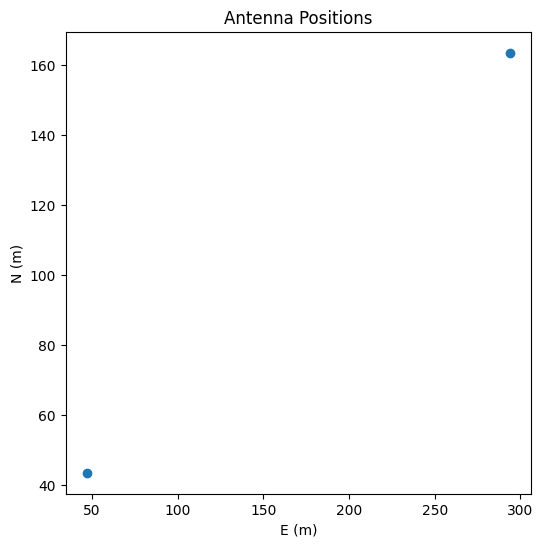

In [31]:
plot_antenna_config(baseline_4)

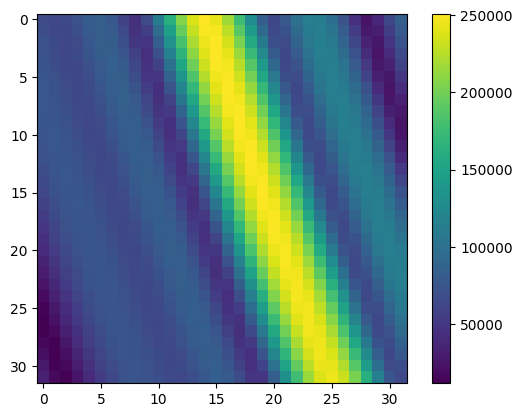

In [32]:
grid_XX = subgrids[0].reshape(subgrid_size, subgrid_size)

plt.imshow(np.abs(grid_XX))
plt.colorbar()

## A simple DATA - MODEL subtraction from CASA's uvsub

CASA task `uvsub`, method `VisSetUtil::UVSub` in `VisSetUtil.cc` in CASA's source

https://casadocs.readthedocs.io/en/v6.5.1/api/tt/casatasks.manipulation.uvsub.html


In [33]:
def uvsub(ps, reverse=False):
    if reverse:
        ps["VISIBILITY_CORRECTED"] = ps.VISIBILITY + ps.VIS_MODEL
    else:
        ps["VISIBILITY_CORRECTED"] = ps.VISIBILITY - ps.VIS_MODEL

    ps.attrs["data_groups"]["corrected"] = {
        "visibility": "VISIBILITY_CORRECTED",
        "flag": "FLAG",
        "weight": "WEIGHT",
        "uvw": "UVW",
    }
    ps.VISIBILITY_CORRECTED.attrs["frame"] = ps.VISIBILITY.attrs["field_info"]
    return ps

In [34]:
res_ps = uvsub(ps)

## PlotMS

In [35]:
def plot_ms(ps):
    vis_avg = ps.VISIBILITY.mean(dim=['time', 'baseline_id'])
    plt.plot(np.abs(vis_avg), '.')
    plt.xlabel('channel')
    plt.ylabel('amp')

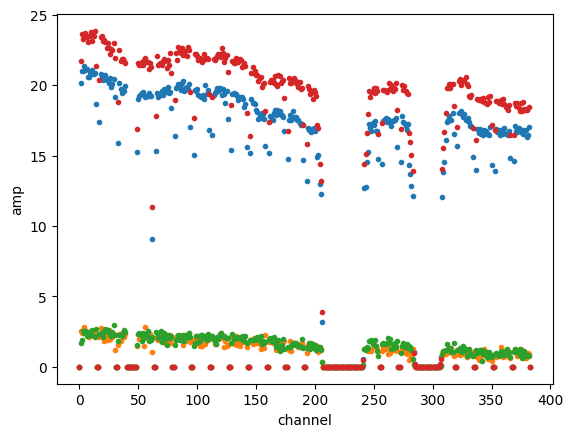

In [36]:
plot_ms(ps)

## UV Subtraction

In [37]:
selection = ps.sel({"baseline_id": [4], "polarization": "XX"}).isel(time=[1])
# selection = ps.sel({"baseline_id": [4], "polarization": "XX"}).isel(frequency=[1])

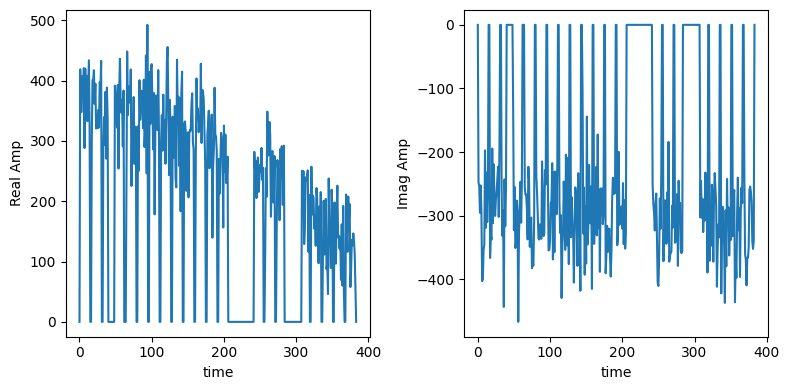

In [38]:
vis_channel = selection.VISIBILITY.squeeze().values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(vis_channel.real)
ax1.set_xlabel("time")
ax1.set_ylabel("Real Amp")

ax2.plot(vis_channel.imag)
ax2.set_xlabel("time")
ax2.set_ylabel("Imag Amp")

plt.tight_layout()

In [41]:
from numpy.polynomial import Polynomial

ntime = vis_channel.imag.size

chan_mask = slice(100, 200)

xx = np.arange(ntime)
yreal = vis_channel.real
yimag = vis_channel.imag

w = np.ones(ntime)
w[chan_mask] = 0

order=1

solution_real = Polynomial.fit(xx, yreal, order, w=w)
solution_imag = Polynomial.fit(xx, yimag, order, w=w)

In [42]:
preal = Polynomial(solution_real.convert().coef)
pimag = Polynomial(solution_imag.convert().coef)

model_real = preal(xx)
model_imag = pimag(xx)
model_vis = model_real + 1j * model_imag

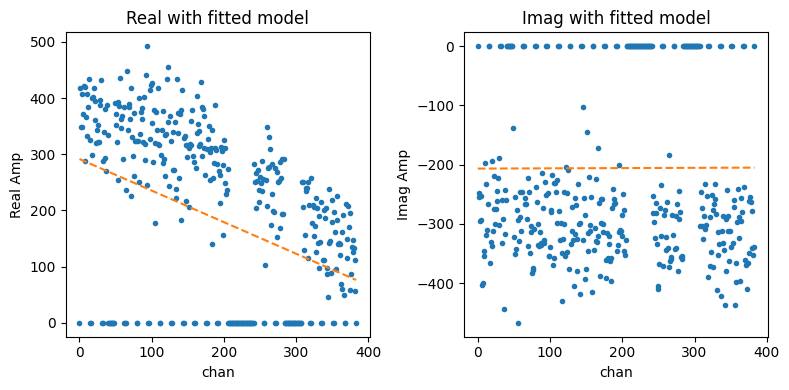

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(yreal, '.')
ax1.plot(model_real, '--')
ax1.set_xlabel("chan")
ax1.set_ylabel("Real Amp")
ax1.set_title("Real with fitted model")

ax2.plot(yimag, '.')
ax2.plot(model_imag, '--')
ax2.set_xlabel("chan")
ax2.set_ylabel("Imag Amp")
ax2.set_title("Imag with fitted model")

# plt.title("Visibility with Fitted Model")
fig.tight_layout()

In [44]:
residual_vis = vis_channel - model_vis

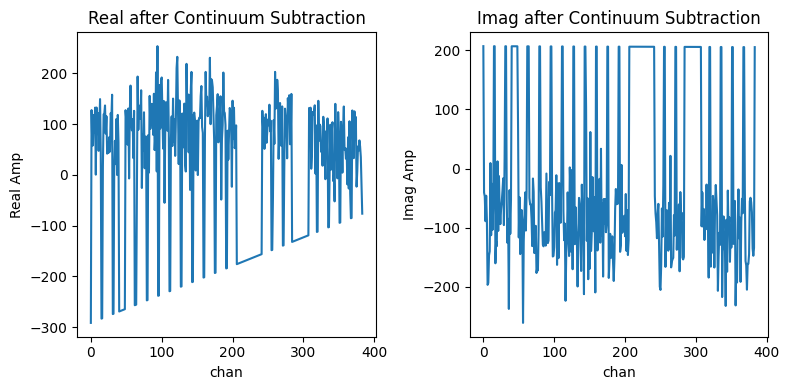

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(residual_vis.real)
ax1.set_xlabel("chan")
ax1.set_ylabel("Real Amp")
ax1.set_title("Real after Continuum Subtraction")

ax2.plot(residual_vis.imag)
ax2.set_xlabel("chan")
ax2.set_ylabel("Imag Amp")
ax2.set_title("Imag after Continuum Subtraction")

plt.tight_layout()